In [1]:
!pip install scikit-learn

In [2]:
!pip install pandas openpyxl

In [3]:
#Definir las librerias para el transcurso del proyecto
import numpy as np #Manejo de arrays
import matplotlib.pyplot as plt #Visualización de resultados 
import os #Directorios y cargar datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from PIL import Image #Abrir, convertir y transformar imagenes.
from sklearn.preprocessing import LabelEncoder #Etiquetas de texto a valores numericos.
import random
import pandas as pd

In [4]:
#Funcion para cargar las imagenes
def load_data(data_dir):
    X = []
    y = []
    for class_name in ['Overwatch', 'Marvel Rivals']:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = Image.open(file_path).convert('L')  # Convertir a escala de grises
            image = image.resize((64, 64))  # Redimensionar
            image = np.array(image).flatten()  # Aplanar
            X.append(image)
            y.append(class_name)
    return np.array(X), np.array(y)

In [5]:
#Cargamos los datasets
data_dir = 'imgs'   # carpeta principal
X, y = load_data(data_dir)

In [6]:
#Codificamos las etiquetas y dividimos los datasets
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#PCA
pca = PCA(n_components=0.95)  # conservar 95% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
#Entrenar SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
#Predicciones y evaluación
y_pred = svm.predict(X_test_pca)
num_correctas = (y_pred == y_test).sum()
fscore = f1_score(y_test, y_pred, average='macro')

print("Número de clasificaciones correctas:", num_correctas)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F-score:", fscore)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Número de clasificaciones correctas: 17
Accuracy: 0.9444444444444444
F-score: 0.9428571428571428
Classification Report:
                precision    recall  f1-score   support

Marvel Rivals       0.88      1.00      0.93         7
    Overwatch       1.00      0.91      0.95        11

     accuracy                           0.94        18
    macro avg       0.94      0.95      0.94        18
 weighted avg       0.95      0.94      0.94        18



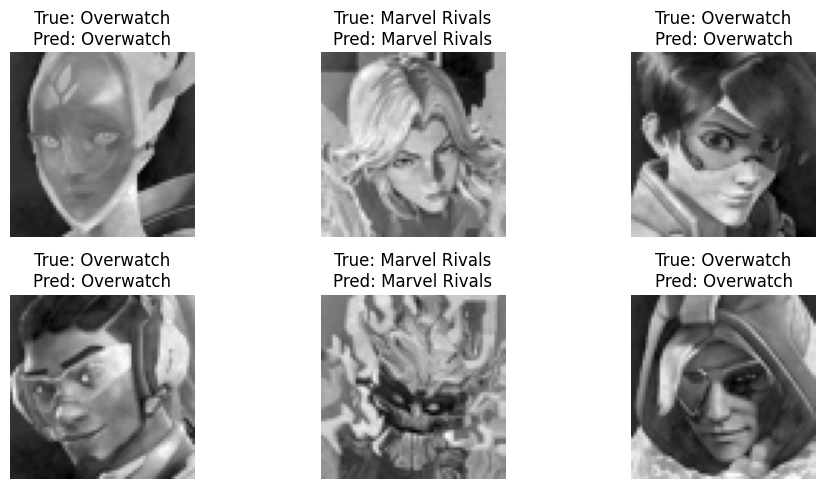

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X_test[i].reshape(64, 64)  # reconstruir imagen
    ax.imshow(image, cmap='gray')
    true_label = label_encoder.inverse_transform([y_test[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

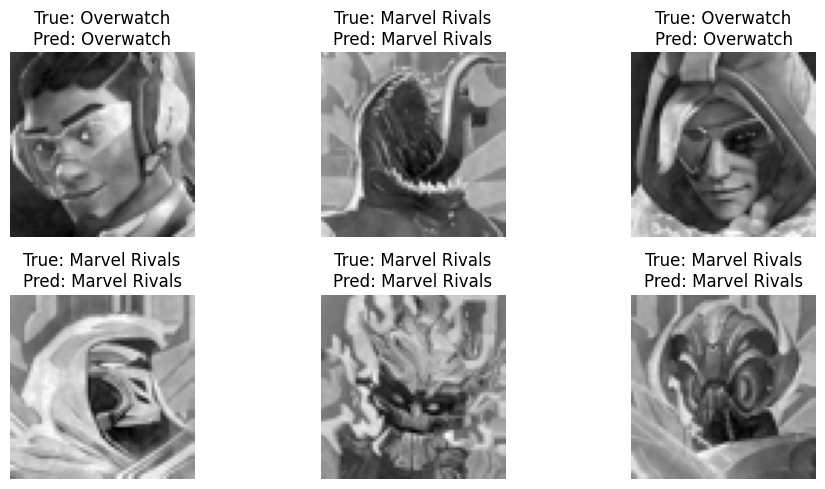

In [12]:
# Indices aleatorios de los datos de predicción
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
indices = random.sample(range(len(X_test)), 6)
for i, ax in zip(indices, axes.flat):
    image = X_test[i].reshape(64, 64)  # reconstruir imagen
    ax.imshow(image, cmap='gray')
    true_label = label_encoder.inverse_transform([y_test[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

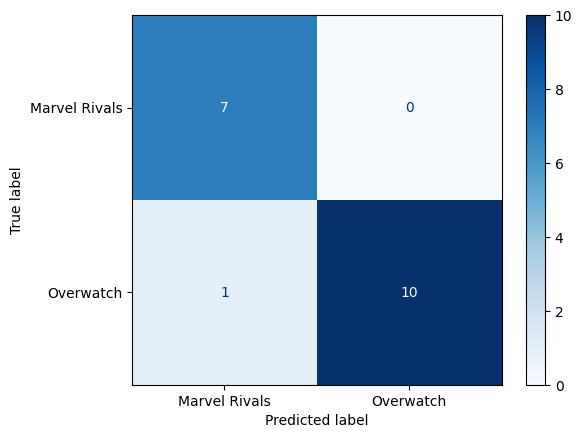

In [13]:
#Matriz de confusión
ConfusionMatrixDisplay.from_estimator(
    svm,              
    X_test_pca,       # datos de predicción
    y_test,           # etiquetas reales
    display_labels=label_encoder.classes_,  # nombres de clases
    cmap="Blues"     
)
plt.show()

In [14]:
# Predicciones para las imagenes de Prueba
# Función para cargar imágenes
def load_test_data(data_dir):
    X = []
    y = []
    for file_name in os.listdir(data_dir):
        file_path = os.path.join(data_dir, file_name)
        image = Image.open(file_path).convert('L').resize((64,64))
        image = np.array(image).flatten()
        X.append(image)

        # Detectar clase por nombre de archivo
        if "overwatch" in file_name.lower():
            y.append("Overwatch")
        elif "marvel" in file_name.lower():
            y.append("Marvel Rivals")
    return np.array(X), np.array(y)

# Cargar imágenes de prueba
X_prueba, y_prueba = load_test_data("imgs/Prueba")

# Codificar etiquetas
y_prueba_encoded = label_encoder.transform(y_prueba)

# Transformar con scaler y PCA ya entrenados
X_prueba_scaled = scaler.transform(X_prueba)
X_prueba_pca = pca.transform(X_prueba_scaled)

# Predicción
y_prueba_pred = svm.predict(X_prueba_pca)

# Evaluación
accuracy_prueba = accuracy_score(y_prueba_encoded, y_prueba_pred)
num_correctas = (y_prueba_pred == y_prueba_encoded).sum()
fscore_macro = f1_score(y_prueba_encoded, y_prueba_pred, average='macro')

print("Evaluación con imágenes de Prueba")
print("Accuracy:", accuracy_prueba)
print("Número de clasificaciones correctas:", num_correctas)
print("F-score:", fscore_macro)
print("Classification Report:\n", classification_report(y_prueba_encoded, y_prueba_pred, target_names=label_encoder.classes_))

Evaluación con imágenes de Prueba
Accuracy: 0.5
Número de clasificaciones correctas: 10
F-score: 0.4791666666666667
Classification Report:
                precision    recall  f1-score   support

Marvel Rivals       0.50      0.30      0.38        10
    Overwatch       0.50      0.70      0.58        10

     accuracy                           0.50        20
    macro avg       0.50      0.50      0.48        20
 weighted avg       0.50      0.50      0.48        20



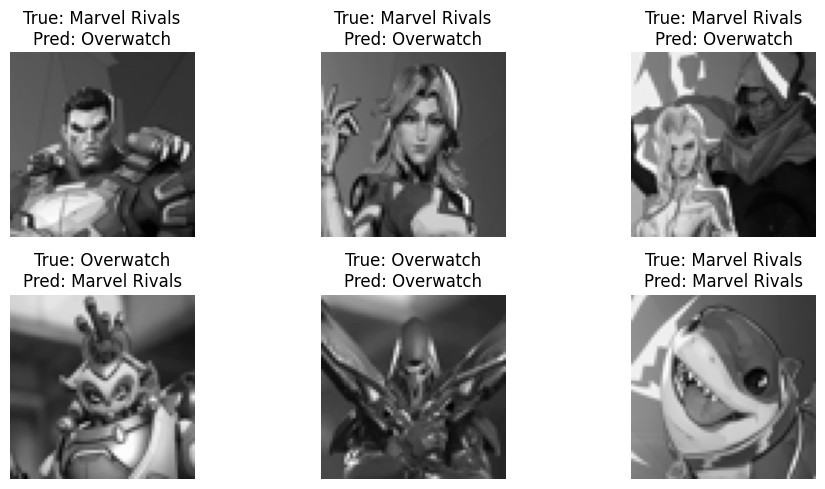

In [18]:
# Indices aleatorios de los datos de predicción
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
indices = random.sample(range(len(X_prueba)), 6)
for i, ax in zip(indices, axes.flat):
    image = X_prueba[i].reshape(64, 64)
    ax.imshow(image, cmap='gray')
    true_label = y_prueba[i]
    pred_label = label_encoder.inverse_transform([y_prueba_pred[i]])[0]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Crear DataFrame con resultados del conjunto externo
resultados_prueba = pd.DataFrame({
    "Real": y_prueba,  
    "Predicción": label_encoder.inverse_transform(y_prueba_pred) 
})

# Guardar en Excel
resultados_prueba.to_excel("resultados_prueba_clasificador.xlsx", index=False)

In [17]:
df_prueba = pd.read_excel("resultados_prueba_clasificador.xlsx")
print(df_prueba.head())

            Real     Predicción
0  Marvel Rivals      Overwatch
1  Marvel Rivals  Marvel Rivals
2  Marvel Rivals      Overwatch
3  Marvel Rivals      Overwatch
4  Marvel Rivals      Overwatch
